In [1]:
import tarfile
import pandas as pd
import os 
import pathlib
import zipfile
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
notebook_dir = os.getcwd()
root_dir = os.path.join('/home/imkushwaha/' ,"aiops-scania-pressure-brakes-prediction/")

In [3]:
os.path.exists(root_dir)

True

In [4]:
artifacts_dir = os.path.join(root_dir, "artifacts")
raw_data_dir = os.path.join(artifacts_dir, "raw_data_dir")
processed_data_dir = os.path.join(artifacts_dir, "processed_data_dir")

os.makedirs(raw_data_dir, exist_ok=True)
os.makedirs(processed_data_dir, exist_ok=True)

In [5]:
data_dir = os.path.join(root_dir, "data")
zip_file_dir = os.path.join(data_dir, "archive.zip")

os.path.exists(zip_file_dir)

True

In [6]:
with zipfile.ZipFile(zip_file_dir, 'r') as zip_ref:
    zip_ref.extractall(raw_data_dir)

In [5]:
train_file = os.path.join(raw_data_dir, "aps_failure_training_set.csv")
processed_data_file = os.path.join(raw_data_dir, "aps_failure_training_set_processed_8bit.csv")

In [6]:
train_data = pd.read_csv(train_file)

# Data Preprocessing and Feature engineering

- We have processed data (provided by their side only !!)
- but we try to do preprocessing from our side

In [8]:
train_data.sample(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
6574,neg,29062,na,0,na,0,0,0,0,0,...,306742,170192,358870,296660,125948,28516,18212,2,0,0
35040,neg,14,na,42,18,0,0,0,0,0,...,218,50,60,14,12,2,0,0,0,0
16901,neg,243704,na,na,na,na,na,0,0,14710,...,1139008,413496,824870,766788,979250,6064132,86848,0,na,na
31944,neg,2286,na,34,30,0,0,0,0,0,...,11148,8296,40084,46884,1876,196,96,0,0,0
40607,neg,6656,na,0,na,0,0,0,0,0,...,24556,12774,51494,208940,5800,1378,272,0,0,0


In [9]:
# shape of data
train_data.shape

(60000, 171)

In [13]:
train_data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [16]:
train_data["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

##### Highly imbalanced data:
- negative class: 59k
- pos class: 1k


In [17]:
train_data.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [18]:
train_data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

- According to description text file Missing values are denoted by "na".

In [7]:
def check_null_values(df:pd.DataFrame):
    column_dict = {}
    columns = df.columns
    for column in columns:
        null_count = df[df[column] == "na"].shape[0]
        column_dict[column] = null_count
    return column_dict

In [8]:
check_null_values(train_data)

{'class': 0,
 'aa_000': 0,
 'ab_000': 46329,
 'ac_000': 3335,
 'ad_000': 14861,
 'ae_000': 2500,
 'af_000': 2500,
 'ag_000': 671,
 'ag_001': 671,
 'ag_002': 671,
 'ag_003': 671,
 'ag_004': 671,
 'ag_005': 671,
 'ag_006': 671,
 'ag_007': 671,
 'ag_008': 671,
 'ag_009': 671,
 'ah_000': 645,
 'ai_000': 629,
 'aj_000': 629,
 'ak_000': 4400,
 'al_000': 642,
 'am_0': 629,
 'an_000': 642,
 'ao_000': 589,
 'ap_000': 642,
 'aq_000': 589,
 'ar_000': 2723,
 'as_000': 629,
 'at_000': 629,
 'au_000': 629,
 'av_000': 2500,
 'ax_000': 2501,
 'ay_000': 671,
 'ay_001': 671,
 'ay_002': 671,
 'ay_003': 671,
 'ay_004': 671,
 'ay_005': 671,
 'ay_006': 671,
 'ay_007': 671,
 'ay_008': 671,
 'ay_009': 671,
 'az_000': 671,
 'az_001': 671,
 'az_002': 671,
 'az_003': 671,
 'az_004': 671,
 'az_005': 671,
 'az_006': 671,
 'az_007': 671,
 'az_008': 671,
 'az_009': 671,
 'ba_000': 688,
 'ba_001': 688,
 'ba_002': 688,
 'ba_003': 688,
 'ba_004': 688,
 'ba_005': 688,
 'ba_006': 688,
 'ba_007': 688,
 'ba_008': 688,
 'ba

- Almost every feature has missing values and few features has more than 30k,
- also except aa_000 feature, all features data type is object,
- we need to change data type and string na into float('nan') to deal with missing values.

In [10]:
def change_dtype(x):
    if x == "na":
        return float('nan')
    else:
        return float(x)

In [11]:
# Changing the data type of object column and replacing "na" with np.nan
all_input_columns = list(train_data.columns)[1:]
for input_col in all_input_columns:
    if train_data[input_col].dtype =='O':
        train_data[input_col] = train_data[input_col].apply(change_dtype)
    else:
        pass

In [12]:
train_data.sample(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
8986,neg,674794,0.0,4760.0,502.0,0.0,0.0,0.0,764.0,305104.0,...,452528.0,356282.0,655216.0,682974.0,22198.0,2230.0,342.0,0.0,134.0,892.0
24917,neg,60956,NaN,416.0,356.0,0.0,0.0,0.0,0.0,0.0,...,420878.0,208804.0,485252.0,501012.0,666906.0,400810.0,41504.0,514.0,0.0,0.0
17388,neg,190532,NaN,288.0,200.0,0.0,0.0,0.0,1170.0,134384.0,...,818320.0,581016.0,1482334.0,1208458.0,2620464.0,1752850.0,4868.0,0.0,0.0,0.0
18769,neg,38292,NaN,652.0,606.0,0.0,0.0,0.0,0.0,0.0,...,296872.0,151324.0,315336.0,285530.0,342708.0,178864.0,134712.0,30.0,0.0,0.0
47020,neg,28982,NaN,962.0,888.0,0.0,0.0,0.0,0.0,0.0,...,294446.0,128164.0,293724.0,291706.0,165978.0,73730.0,53794.0,16.0,0.0,0.0


In [13]:
train_data.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [14]:
train_data.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [15]:
# summary
train_data.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [16]:
skew_report = train_data.skew(axis=0, skipna=True)
skew_report

aa_000      6.115752
ab_000     28.085266
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 170, dtype: float64

- All features are highly skewed

<Axes: xlabel='aa_000', ylabel='Density'>

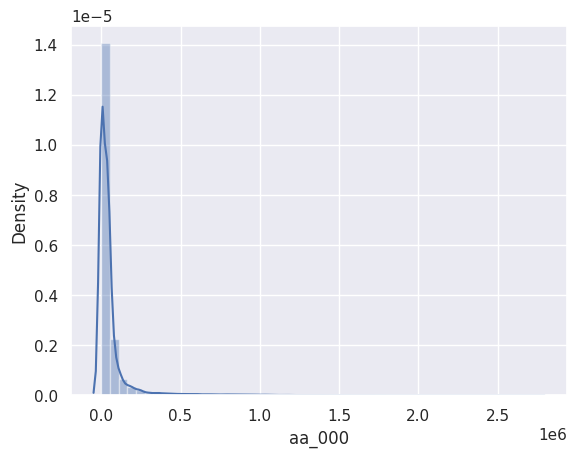

In [126]:
sns.distplot(train_data["aa_000"])

<Axes: xlabel='ac_000', ylabel='Density'>

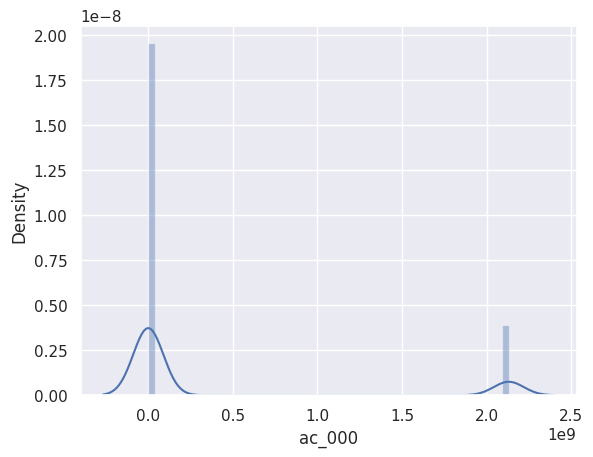

In [121]:
sns.distplot(train_data["ac_000"])

<Axes: xlabel='ad_000', ylabel='Density'>

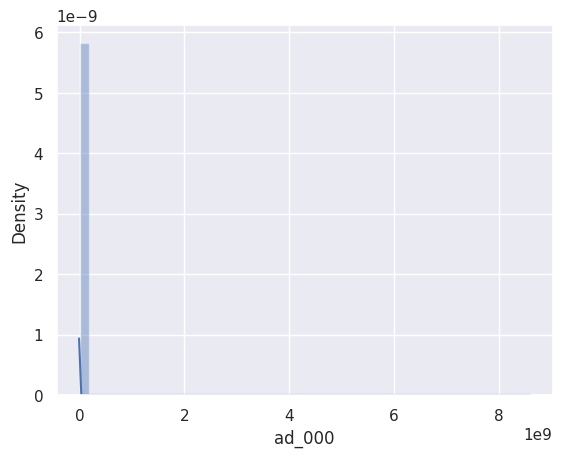

In [127]:
sns.distplot(train_data["ad_000"])

In [20]:
train_data.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ab_000,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,0.068100,...,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
ac_000,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
ae_000,0.061971,0.031031,-0.004997,-0.000214,1.000000,0.823108,-0.000430,-0.000832,0.005057,0.034163,...,0.017338,0.024905,0.017311,0.039967,0.085884,0.052357,-0.010850,-0.008206,0.070886,0.041715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.606232,0.023867,-0.029417,-0.000829,0.052357,0.070306,0.000307,0.044186,0.182990,0.505565,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000715,0.002708
ee_008,0.471707,0.039369,0.016908,-0.002161,-0.010850,-0.013976,-0.000823,0.004878,0.009466,0.021151,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.006991,-0.002833
ee_009,0.248039,0.074119,0.024354,-0.001050,-0.008206,-0.010237,-0.001230,-0.004309,-0.009498,-0.019311,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003942,-0.000907
ef_000,0.019865,0.055590,-0.006571,-0.000102,0.070886,0.106281,-0.000072,0.002875,0.011824,0.020560,...,0.007118,0.017480,0.005835,0.050270,0.008461,-0.000715,-0.006991,-0.003942,1.000000,0.282184


In [17]:
train_data.sample(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
49544,pos,175130,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,270616.0,32696.0,20820.0,7234.0,6598.0,3302.0,634.0,0.0,0.0,0.0
7793,neg,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25300,neg,2224,NaN,90.0,NaN,0.0,0.0,0.0,0.0,0.0,...,12018.0,5860.0,20844.0,17908.0,17518.0,23112.0,160.0,0.0,0.0,0.0
21144,neg,18,0.0,46.0,32.0,0.0,0.0,0.0,0.0,0.0,...,128.0,32.0,58.0,34.0,36.0,72.0,0.0,0.0,0.0,0.0
47304,neg,38898,NaN,1172.0,NaN,0.0,0.0,0.0,0.0,0.0,...,271842.0,123758.0,308528.0,283880.0,227674.0,151392.0,294062.0,17574.0,0.0,0.0


In [21]:
X = train_data.drop(columns=["class"], axis=0)
Y = train_data["class"]

In [24]:
# Imputing missing values with medina values of respective attribute
X = X.apply(lambda x: x.fillna(x.median()), axis=0)

In [26]:
X.sample(5)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
47238,10,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25624,10,0.0,20.0,20.0,0.0,2.0,0.0,0.0,0.0,0.0,...,102.0,40.0,114.0,52.0,22.0,0.0,0.0,0.0,0.0,0.0
41350,8,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,4.0,16.0,40.0,32.0,38.0,0.0,0.0,0.0,0.0
23454,62742,0.0,1094.0,910.0,0.0,0.0,0.0,0.0,0.0,0.0,...,414734.0,176800.0,321144.0,284638.0,223648.0,224466.0,802048.0,148066.0,0.0,0.0
31438,28,0.0,22.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140.0,18.0,42.0,14.0,10.0,42.0,0.0,0.0,0.0,0.0


In [28]:
X.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [29]:
X.var()

aa_000    2.114990e+10
ab_000    2.847041e+00
ac_000    6.033600e+17
ad_000    1.228169e+15
ae_000    2.501076e+04
              ...     
ee_007    2.953811e+12
ee_008    2.000008e+11
ee_009    2.229019e+09
ef_000    1.822069e+01
eg_000    7.444312e+01
Length: 170, dtype: float64

In [30]:
X.std()

aa_000    1.454301e+05
ab_000    1.687318e+00
ac_000    7.767625e+08
ad_000    3.504525e+07
ae_000    1.581479e+02
              ...     
ee_007    1.718666e+06
ee_008    4.472145e+05
ee_009    4.721249e+04
ef_000    4.268570e+00
eg_000    8.628043e+00
Length: 170, dtype: float64

- We have more than 150 features and also these are operational data coming out from a software with no name due to proprietary reasons (the attribute names of the data have been anonymized for proprietary reasons).

- Variance of some features are almost same and few has very high variance,
- we will try to extract new set of features from existing ones in such a way that more variance can be captured from the higher dimension.

# Feature Extraction
- Principal Componet Analysis
- https://github.com/datasciencedevotee/Machine-Learning/blob/main/PCA/PCA_Step_by_Step.ipynb

In [37]:
Y.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

- Positive class: The datasets positive class consists of component failures for a specific component of the APS system. 
- Negative class: The negative class consists of trucks with failures for components not related to the APS.

In [38]:
def target_label_encoding(y):
    if y == "neg":
        return 0
    else:
        return 1

In [40]:
Y = Y.apply(target_label_encoding)

In [41]:
# Let's make a validation set which we will use for hyperparameter tunning
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

In [43]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_val.shape}")

Shape of X_train: (48000, 170)
Shape of X_test: (12000, 170)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [45]:
from sklearn.decomposition import PCA

#### Now lets find optimum numer of components

In [46]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_val_trf = pca.transform(X_val)

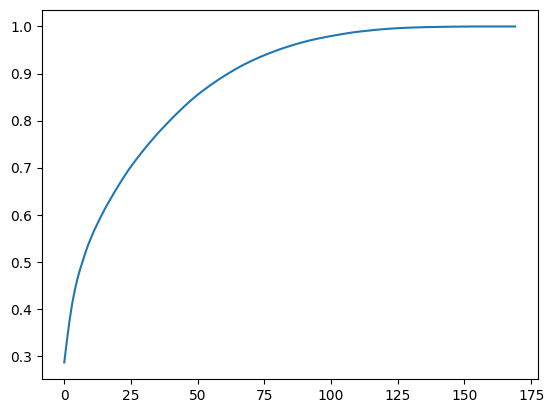

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

- From above graph we can se that 90% variance is being calculated by 60 to 65 components

In [52]:
# we will go with 65 principal components
pca = PCA(n_components=65)
X_train_trf = pca.fit_transform(X_train)
X_val_trf = pca.transform(X_val)

### KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [60]:
import time
start = time.time()
y_pred = knn.predict(X_val_trf)
print(f"Total time take for execution: {(time.time() - start)}")

Total time take for execution: 2.178431510925293


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_val, y_pred)*100

98.93333333333332

In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11788
           1       0.80      0.52      0.63       212

    accuracy                           0.99     12000
   macro avg       0.90      0.76      0.81     12000
weighted avg       0.99      0.99      0.99     12000



In [66]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11761,    27],
       [  101,   111]])

In [117]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 27*10+101*500
cost

50770

In [74]:
cross_val_score(knn, X_train_trf, y_train, cv=10)

array([0.99104167, 0.99      , 0.99041667, 0.990625  , 0.99      ,
       0.98916667, 0.99041667, 0.99104167, 0.99041667, 0.99145833])

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [68]:
dt_classifier.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dt_classifier.predict(X_val_trf)

In [70]:
accuracy_score(y_val, y_pred)*100

98.5

In [71]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11788
           1       0.57      0.60      0.59       212

    accuracy                           0.98     12000
   macro avg       0.78      0.80      0.79     12000
weighted avg       0.99      0.98      0.99     12000



In [72]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11693,    95],
       [   85,   127]])

In [118]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 95*10+85*500
cost

43450

In [75]:
cross_val_score(dt_classifier, X_train_trf, y_train, cv=10)

array([0.985625  , 0.985625  , 0.9875    , 0.98833333, 0.98770833,
       0.985     , 0.98666667, 0.98354167, 0.98625   , 0.98583333])

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=None, random_state=0)

In [79]:
rf_clf.fit(X_train_trf,y_train)

RandomForestClassifier(random_state=0)

In [80]:
y_pred = rf_clf.predict(X_val_trf)

In [81]:
accuracy_score(y_val, y_pred)*100

99.06666666666666

In [82]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.83      0.59      0.69       212

    accuracy                           0.99     12000
   macro avg       0.91      0.80      0.84     12000
weighted avg       0.99      0.99      0.99     12000



In [85]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11762,    26],
       [   86,   126]])

In [119]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 26*10+86*500
cost

43260

### XG Boost

In [93]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [94]:
xgb_clf.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
y_pred = xgb_clf.predict(X_val_trf)

In [96]:
accuracy_score(y_val, y_pred)*100

99.175

In [97]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.84      0.66      0.74       212

    accuracy                           0.99     12000
   macro avg       0.92      0.83      0.87     12000
weighted avg       0.99      0.99      0.99     12000



In [98]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11762,    26],
       [   73,   139]])

In [120]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 26*10+73*500
cost

36760

#### Balancing two classes
- As we know that our data set is highlt imbalanced,
- whatever model till now we have tried, XG-Boost is performing best with low cost and good precision and recall.
- Now we are going to try few techniques of balancing the imbalanced dataset,
- and see whether we able to increase model metrics or not.


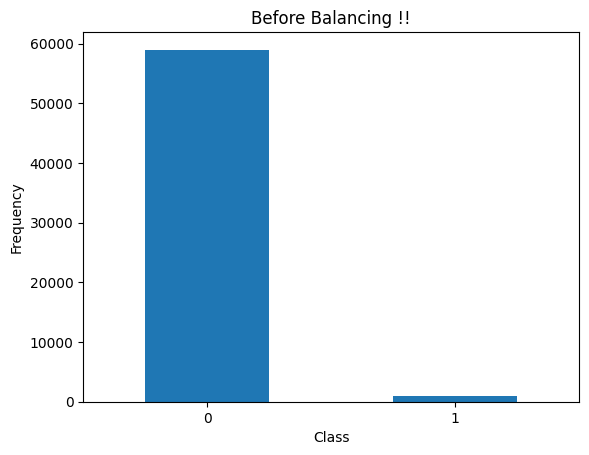

In [115]:
count_classes = Y.value_counts()

count_classes.plot(kind = 'bar', rot=0)

plt.title("Before Balancing !!")

plt.xlabel("Class")

plt.ylabel("Frequency")

plt.show()

In [101]:
from imblearn.combine import SMOTETomek

In [105]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [106]:
X_res

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.000000,2.130706e+09,280.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.240520e+06,4.933840e+05,7.210440e+05,4.697920e+05,3.391560e+05,1.579560e+05,7.322400e+04,0.000000,0.0,0.0
1,33058,0.000000,0.000000e+00,126.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,...,4.214000e+05,1.780640e+05,2.933060e+05,2.454160e+05,1.336540e+05,8.114000e+04,9.757600e+04,1500.000000,0.0,0.0
2,41040,0.000000,2.280000e+02,100.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,...,2.773780e+05,1.598120e+05,4.239920e+05,4.095640e+05,3.207460e+05,1.580220e+05,9.512800e+04,514.000000,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.000000,0.000000,0.000000e+00,3.180000e+02,...,2.400000e+02,4.600000e+01,5.800000e+01,4.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,4.0,32.0
4,60874,0.000000,1.368000e+03,458.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,...,6.220120e+05,2.297900e+05,4.052980e+05,3.471880e+05,2.869540e+05,3.115600e+05,4.339540e+05,1218.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,883584,0.000000,1.520000e+02,126.000000,0.0,0.0,0.000000,78.724571,2.300726e+04,7.741951e+05,...,1.095504e+07,3.921704e+06,7.442646e+06,6.761403e+06,3.670134e+06,2.015080e+06,1.322761e+06,31756.419554,0.0,0.0
117984,1643031,0.000000,1.520000e+02,126.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,8.610482e+03,...,1.375831e+07,7.535357e+06,1.928811e+07,1.611022e+07,1.016876e+07,4.413486e+06,3.854916e+06,103649.576315,0.0,0.0
117985,642482,2.629103,1.496756e+03,304.779002,0.0,0.0,4493.136979,150040.756765,1.228286e+06,5.613544e+06,...,3.558291e+06,1.842948e+06,4.442680e+06,6.533688e+06,8.739386e+06,3.437744e+06,7.773594e+04,13.145515,0.0,0.0
117986,446093,0.000000,1.911380e+03,1228.422338,0.0,0.0,0.000000,574.149203,2.968010e+05,4.118262e+06,...,2.219890e+06,1.028396e+06,2.759218e+06,4.401657e+06,5.572968e+06,3.542339e+06,8.294097e+04,9.913392,0.0,0.0


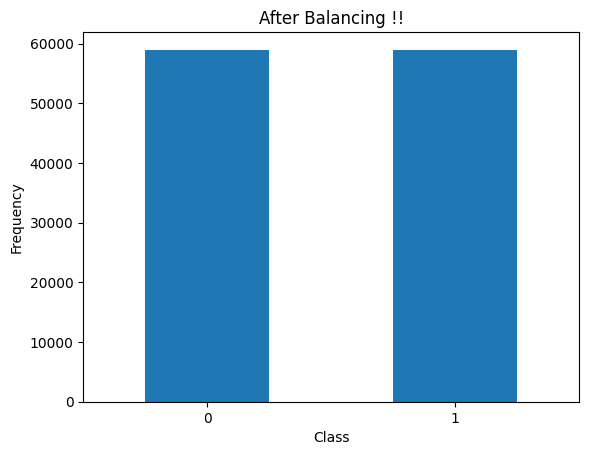

In [116]:
count_classes = y_res.value_counts()

count_classes.plot(kind = 'bar', rot=0)

plt.title("After Balancing !!")

plt.xlabel("Class")

plt.ylabel("Frequency")

plt.show()

#### Now let's do PCA in balanced dataset

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [123]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_val.shape}")

Shape of X_train: (94390, 170)
Shape of X_test: (23598, 170)


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [126]:
from sklearn.decomposition import PCA

#### Now lets find optimum numer of components

In [127]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_val_trf = pca.transform(X_val)

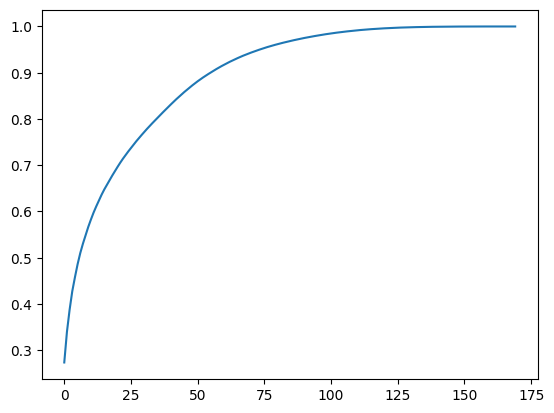

In [128]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

- Optimum number of components is somewhere between 50 to 56

In [131]:
# we will go with 65 principal components
pca = PCA(n_components=56)
X_train_trf = pca.fit_transform(X_train)
X_val_trf = pca.transform(X_val)

##### Now let's check the performance on XG-Boost classifier

In [132]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [133]:
xgb_clf.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [134]:
y_pred = xgb_clf.predict(X_val_trf)

In [135]:
accuracy_score(y_val, y_pred)*100

99.46181879820324

In [136]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11932
           1       0.99      1.00      0.99     11666

    accuracy                           0.99     23598
   macro avg       0.99      0.99      0.99     23598
weighted avg       0.99      0.99      0.99     23598



In [137]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11809,   123],
       [    4, 11662]])

In [138]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 123*10+4*500
cost

3230

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

In [142]:
auc = roc_auc_score(y_val,y_pred)
auc

0.9946743544581073

In [141]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

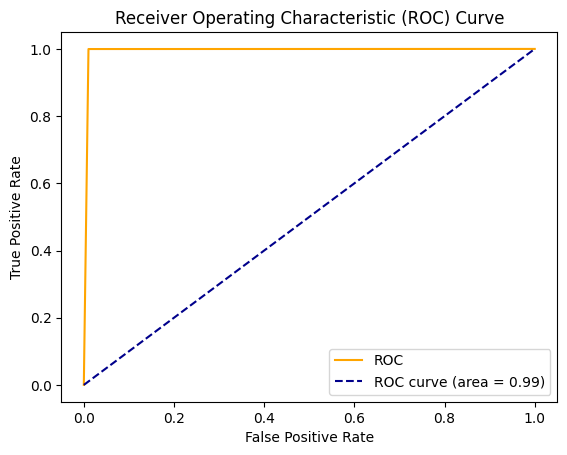

In [143]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Hyperparameter Tuning: XG-Boost

#### Bayesian Optimization with HYPEROPT

- Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

- Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

- In this process, we train the model with various possible range of parameters until a best fit model is obtained.

- Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.

#### What is HYPEROPT 

- HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

- Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

- More information on Hyperopt can be found at the following link:-

- https://hyperopt.github.io/hyperopt/?source=post_page

In [147]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [144]:
from sklearn.model_selection import RandomizedSearchCV

##### The available hyperopt optimization algorithms are -

- hp.choice(label, options) — Returns one of the options, which should be a list or tuple.

- hp.randint(label, upper) — Returns a random integer between the range [0, upper).

- hp.uniform(label, low, high) — Returns a value uniformly between low and high.

- hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

- hp.normal(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

In [150]:
# Initialize domain space for range of values

space = {'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [151]:
def objective(space):
    clf = XGBClassifier(
                        n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_trf, y_train), ( X_val_trf, y_val)]
    
    clf.fit(X_train_trf, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val_trf)
    accuracy = accuracy_score(y_val, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [152]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                                          
0.9521993389270277                                                                                                                              
SCORE:                                                                                                                                          
0.9505466564963132                                                                                                                              
SCORE:                                                                                                                                          
0.9519027036189508                                                                                                                              
SCORE:                                                                                                                            

In [153]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5517075347844577, 'gamma': 1.149710977247239, 'max_depth': 18.0, 'min_child_weight': 7.0, 'reg_alpha': 40.0, 'reg_lambda': 0.026709331943943156}


#### Let's make new xg-boost model using best hyperparameters

In [159]:
xgb_clf_best_params = XGBClassifier(colsample_bytree=0.5517075347844577,
                                    gamma=1.149710977247239,
                                    max_depth=18,
                                    min_child_weight=7.0,
                                    reg_alpha=40.0,
                                    reg_lambda=0.026709331943943156,
                                    n_estimators=180,
                                    seed=0,
                                    booster='gbtree')

In [160]:
xgb_clf_best_params.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5517075347844577, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.149710977247239, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=18,
              max_leaves=None, min_child_weight=7.0, missing=nan,
              monotone_constraints=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [161]:
y_pred = xgb_clf_best_params.predict(X_val_trf)

In [162]:
accuracy_score(y_val, y_pred)*100

98.80922112043393

In [163]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11932
           1       0.98      1.00      0.99     11666

    accuracy                           0.99     23598
   macro avg       0.99      0.99      0.99     23598
weighted avg       0.99      0.99      0.99     23598



In [164]:
confusion_matrix(y_true=y_val, y_pred=y_pred)

array([[11703,   229],
       [   52, 11614]])

In [165]:
# Challenge Metrics
# for cost value refer  aps_failure_description.txt

cost = 229*10+52*500
cost

28290

- xg-boost before hyperparameter tuning is performing better with least cost.
- saving the model...

#### Save the model and processed data to disk

In [168]:
import pickle

filename = 'xgb_finalized_model.sav'
pickle.dump(xgb_clf, open(f"saved_models/{filename}", 'wb'))

In [169]:
filename = 'xgb_tuned_finalized_model.sav'
pickle.dump(xgb_clf_best_params, open(f"saved_models/{filename}", 'wb'))

In [ ]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [176]:
X.to_csv("artifacts/processed_data_dir/processed_X.csv")
Y.to_csv("artifacts/processed_data_dir/processed_Y.csv")